# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [4]:
# calculate mean of data as a sample
charges_mean = medical.charges.mean()
# calculate std of data as a sample
charges_std = medical.charges.std(ddof= 1)
print('Mean of charges:', round(charges_mean,2))
print('Standard deviation of charges:',round(charges_std,2))

Mean of charges: 13270.42
Standard deviation of charges: 12110.01


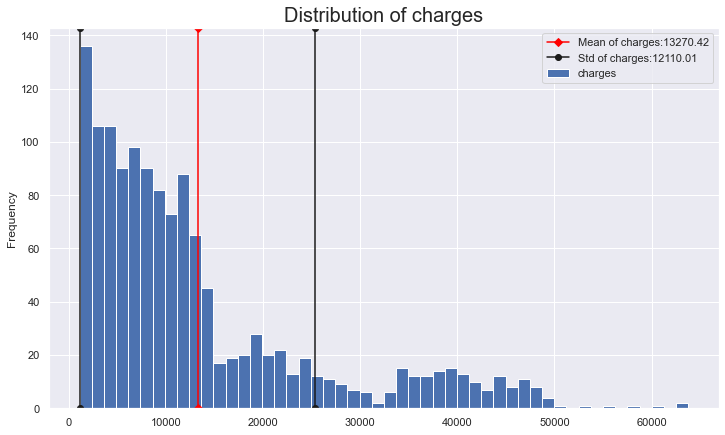

In [7]:
#Plot the histogram of charges
sns.set()
medical.charges.plot(kind='hist', bins=50,figsize=(12,7))
plt.axvline(charges_mean, marker='D', c='red', label= 'Mean of charges:13270.42')
plt.axvline(charges_mean - charges_std, marker='o', c='k', label= 'Std of charges:12110.01')
plt.axvline(charges_mean + charges_std, marker='o', c='k')
plt.title('Distribution of charges', fontsize=20)
plt.legend()
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 

### Data represent a random large sample of charges (sample size is 1338), so based on 'Central Limit Theorem' sample means and other summary statistics tend to have a noraml distribution regardless of underlying sample distribution of charges.

### Setting a one-tailed hypothesis test is the most appropriate test to know whether the mean of charge in populaion is smaller than 12000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ 

### Null hypothesis: Actual mean of population is 12000

### Alternative hypothesis: Actual mean of pupulation is greater than 12000

### Try to find a two-sided interval.

In [8]:
#Take n sample with replacement from the data.
def charges_sampler(n):
    return np.random.choice(medical.charges, size= n, replace=True)

In [9]:
seed(47)
#Sampling 400 observations for 100 times
number_of_sampling = 100
sample_size = 400
#Define a dictionary of mean of each sample and creating a DataFrame from it.
bootstrap = pd.DataFrame({'sample_means': [np.mean(charges_sampler(sample_size)) for i in range(number_of_sampling)]})
#Calculate mean of means of samples
mean_of_means = np.mean(bootstrap.sample_means)
#Calculate std of means of samples. 
std_of_means = np.std(bootstrap.sample_means, ddof=1)

print('mean of means of samples:',round(mean_of_means,2))
print('std of means of samples:',round(std_of_means,2))

mean of means of samples: 13329.23
std of means of samples: 542.76


In [11]:
#Calculate a 95% confidence inverval for the mean of population.
CI= (bootstrap.sample_means.quantile(0.025), bootstrap.sample_means.quantile(0.975))
print('95% Confidence Interval:',CI)

95% Confidence Interval: (12369.427638090627, 14420.594394791187)


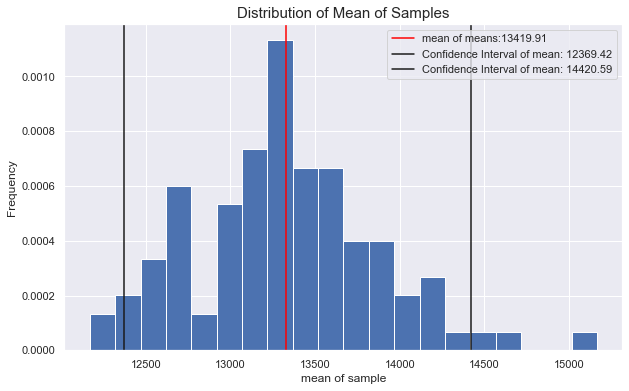

In [12]:
sns.set()
bootstrap.sample_means.hist(bins=20, density= True, figsize=(10,6))
plt.axvline(mean_of_means, c='red',label='mean of means:13419.91')
plt.axvline(CI[0],c='k',label= 'Confidence Interval of mean: 12369.42')
plt.axvline(CI[1],c='k',label= 'Confidence Interval of mean: 14420.59')
plt.legend()

plt.xlabel('mean of sample')
plt.ylabel('Frequency')
plt.title('Distribution of Mean of Samples', fontsize=15)

plt.show()

In [13]:
#P-value corresponding to the value of 12000 in distribution of mean of means.
p_value = 100-st.percentileofscore(bootstrap.sample_means, 12000)
p_value

100.0

### The 95% Confidence interval (12369.43, 14420.59) doesn't include the mean value of 12000 .
### Corresponding p-value for the value of 12000 is 100%, which is not certainly small enough to reject the null hypothsis.
### So mean of charges in population is bigger than 12000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
### Group1 have insurance claim and group0 are without insurance claim.

### Null hypothesis: mean charges of two groups are equal.

### Alternative hypothsis: mean charges of two groups are dirfferent.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [14]:
#Find the percentage of customers with / out insurance claim.
insurance = medical.insuranceclaim.value_counts(normalize=True)
insurance.index = ['isurance_claim','no_insurance_claim']
insurance

isurance_claim        0.585202
no_insurance_claim    0.414798
Name: insuranceclaim, dtype: float64

### 58.5% of customers had insurance calim and 41.5% were without insurance claim.

In [15]:
#Extract two Series of charges values for customers with claim and customers without claim.
no_claim = medical[medical.insuranceclaim ==0]['charges']
with_claim = medical[medical.insuranceclaim ==1]['charges']

#Calculate mean of each group.
mean0 = np.mean(no_claim)
mean1 = np.mean(with_claim)


#Calculate std of each group.
std0 = np.std(no_claim, ddof=1)
std1 = np.std(with_claim, ddof=1)


#Number of customers with claim
n1 = len(with_claim )
#Number of customers without claim
n0= len(no_claim)

print('Number of customers without claim:', n0)
print('Number of customers with claim:', n1)

print('\nMean of charges with claim:', round(mean0,2))
print('Mean of charges without claim:',round(mean1,2))

Number of customers without claim: 555
Number of customers with claim: 783

Mean of charges with claim: 8821.42
Mean of charges without claim: 16423.93


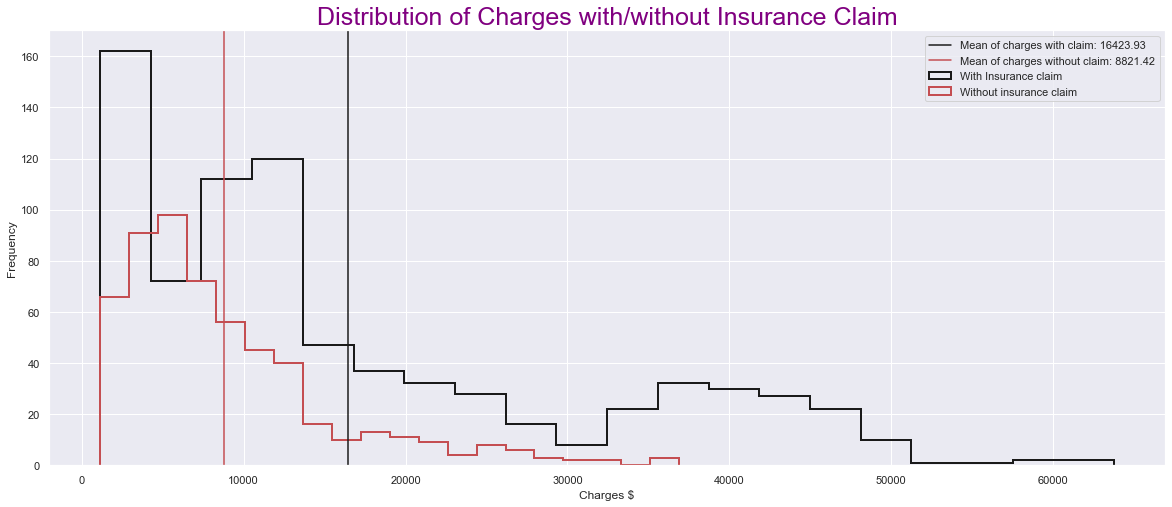

In [16]:
with_claim.plot.hist(histtype='step',bins=20, label= 'With Insurance claim', figsize=(20,8),linewidth=2,edgecolor='k')
no_claim.plot.hist(histtype='step',bins=20, label= 'Without insurance claim',linewidth=2,edgecolor='r')

plt.axvline(mean1, label= 'Mean of charges with claim: 16423.93', c='k')
plt.axvline(mean0, label= 'Mean of charges without claim: 8821.42', c='r')

plt.title('Distribution of Charges with/without Insurance Claim',fontsize=25, c='purple')
plt.xlabel('Charges $')
plt.legend()
plt.show()

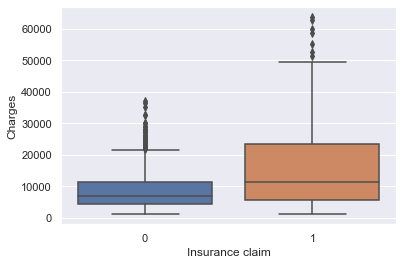

In [30]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='insuranceclaim', y= 'charges', data= medical)

# Label the axes
_ = plt.xlabel('Insurance claim')
_ = plt.ylabel('Charges')

# Show the plot
plt.show()


### Mean of two independent sample groups are quite different. the outliers in group with insurance calim are much bigger than those in group of no claim.
### It seems that both groups have distribution skewed to right (they have right tail).

In [25]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data)+1) / n
    return x, y


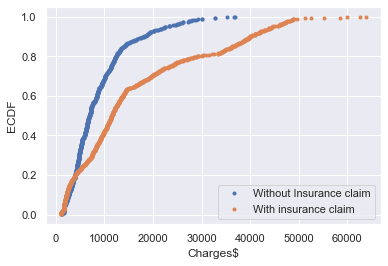

In [26]:
# Compute ECDFs
x0, y0 = ecdf(no_claim)
x1, y1 = ecdf(with_claim)

# Plot all ECDFs on the same plot
_ = plt.plot(x0, y0, marker= '.',linestyle='none')
_ = plt.plot(x1, y1, marker= '.',linestyle='none')


# Annotate the plot
plt.legend(('Without Insurance claim', 'With insurance claim'), loc='lower right')
_ = plt.xlabel('Charges$')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


### Cumulative Density Function of two groups are not similar to normal distribution.

In [31]:
#Calculate t-statistic, critical value and p-value manually
sp = np.sqrt(((n0-1) * np.square(std0) + (n1-1) * np.square(std1)) / (n0 + n1 - 2))
t_stat = (mean0-mean1) / (sp * np.sqrt((1/n0) + (1/n1)))
print('t-statistic:', round(t_stat,2))


# calculate the critical value
df = n0 + n1 - 2
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)
print('Critical value:', round(cv,2))


# calculate the p-value for the t-statistic
p_value = (1 - t.cdf(abs(t_stat), df)) * 2
print('p-value:', p_value)

t-statistic: -11.89
Critical value: 1.65
p-value: 0.0


In [32]:
#Calculate t-statistic, critical value and p-value using scipy
#two independent samples
df = n0 + n1 - 2
st.ttest_ind(no_claim, with_claim, equal_var=True)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

### Since abs(t-statistic) is greater than critical value (11.89 > 1), reject the null hypothesis that the means are equal.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__No, there isn't an equivalent formula for z-test.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test